<a href="https://colab.research.google.com/github/JoseCarlosPorto/SingularTree/blob/main/Part1_CreacionShape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este script no funciona. No da abierto la dirección del csv.

In [ ]:
#Vamos a intentar cargar aquí el script de Carolina de creación de shapefiles a partir de csv

import ogr
import osr

# Create output shapefile
driver = ogr.GetDriverByName('ESRI Shapefile')
data_src = driver.CreateDataSource('TreesCyL.shp')
srs = osr.SpatialReference()
srs.ImportFromEPSG(4326)
layer = data_src.CreateLayer("TreesCyL.shp", srs, geom_type=ogr.wkbPoint)

# Create attribute fields
field_id = ogr.FieldDefn("tree_id", ogr.OFTString)  # podria ser integer?
field_id.SetWidth(10)
layer.CreateField(field_id)

field_code = ogr.FieldDefn("tree_code", ogr.OFTString)
field_code.SetWidth(8)
layer.CreateField(field_code)

layer.CreateField(ogr.FieldDefn("genus", ogr.OFTString))
layer.CreateField(ogr.FieldDefn("species", ogr.OFTString))
layer.CreateField(ogr.FieldDefn("dbh", ogr.OFTReal))
layer.CreateField(ogr.FieldDefn("ht", ogr.OFTReal))
layer.CreateField(ogr.FieldDefn("longitude", ogr.OFTReal))
layer.CreateField(ogr.FieldDefn("latitude", ogr.OFTReal))

with open("https://raw.githubusercontent.com/JoseCarlosPorto/SingularTree/main/arboles.csv", "r") as csv_file:
    csv_reader = csv_reader(csv_file)
    for row in csv_reader:
        feature = ogr.Feature(layer.GetLayerDefn())
        feature.SetField("tree_id", row[0])
        feature.SetField("tree_code", row[1])
        feature.SetField("genus", row[2])
        feature.SetField("species", row[3])
        feature.SetField("dbh", row[4])
        feature.SetField("ht", row[5])
        feature.SetField("longitude", row[6])
        feature.SetField("latitude", row[7])

        # Create point geometry in LAT/LON
        point = org.Geometry(ogr.wkbPoint)
        point.Addpoint(row[6], row[7])

        # Create de feature and set the values
        feature.SetGeometry(point)
        layer.CreateFeature(feature)

        feature = None
    data_src = None

Este script no funciona. SE CONSIGUE ABRIR EL CSV pero no se crea el shapefile

In [ ]:

import ogr
import osr
import pandas as pd
import csv

# Create output shapefile
driver = ogr.GetDriverByName('ESRI Shapefile')
data_src = driver.CreateDataSource('TreesCyL.shp')
srs = osr.SpatialReference()
srs.ImportFromEPSG(4326)
layer = data_src.CreateLayer("TreesCyL.shp", srs, geom_type=ogr.wkbPoint)

# Create attribute fields
field_id = ogr.FieldDefn("tree_id", ogr.OFTString)  # podria ser integer?
field_id.SetWidth(10)
layer.CreateField(field_id)

field_code = ogr.FieldDefn("tree_code", ogr.OFTString)
field_code.SetWidth(8)
layer.CreateField(field_code)

layer.CreateField(ogr.FieldDefn("genus", ogr.OFTString))
layer.CreateField(ogr.FieldDefn("species", ogr.OFTString))
layer.CreateField(ogr.FieldDefn("dbh", ogr.OFTReal))
layer.CreateField(ogr.FieldDefn("ht", ogr.OFTReal))
layer.CreateField(ogr.FieldDefn("longitude", ogr.OFTReal))
layer.CreateField(ogr.FieldDefn("latitude", ogr.OFTReal))

#Abrimos el csv aquí de una forma diferente a Carolina, pero funciona.

url = 'https://raw.githubusercontent.com/JoseCarlosPorto/SingularTree/main/arboles.csv'

df = pd.read_csv(url)

tree_id = df['tree_id']
tree_code = df['tree_code']
genus = df['genus']
species = df['species']
dbh = df['dbh']
ht = df['ht']
longitude = df['longitude']
latitude = df['latitude']

for i in range(0,3): #Aquí debería ponerse directamente la longitud del csv para automatizar, en vez de 3.
    feature = ogr.Feature(layer.GetLayerDefn())
    feature.SetField("tree_id", int(tree_id[i]))
    feature.SetField("tree_code", tree_code[i])
    feature.SetField("genus", genus[i])
    feature.SetField("species", species[i])
    feature.SetField("dbh", dbh[i])
    feature.SetField("ht", ht[i])
    feature.SetField("longitude", longitude[i])
    feature.SetField("latitude", latitude[i])

    # Create point geometry in LAT/LON
    point = ogr.Geometry(ogr.wkbPoint)
    point.Addpoint(int(latitude[i]),int(longitude[i]))

    # Create de feature and set the values
    feature.SetGeometry(point)
    layer.CreateFeature(feature)

    feature = None
data_src = None

Este script Funciona. Simplemente abre el csv usando la libreria pandas. Igual no nos interesa crear un shapefile, hay que ir viendo. Por lo menos aquí ya poderiamos acceder a la longitud y latitud de un csv enorme.

   tree_id tree_code     genus  ... longitude   latitude                   geometry
0        1  AS-AV-01  Fraxinus  ... -5.295226  40.183744  POINT (-5.29523 40.18374)
1        2  AS-AV-03   Quercus  ... -4.959858  40.709539  POINT (-4.95986 40.70954)
2        3  AS-AV-06     Pinus  ... -5.058944  40.297619  POINT (-5.05894 40.29762)

[3 rows x 9 columns]
0    POLYGON ((-589361.815 4865203.536, -589361.815...
1    POLYGON ((-552028.878 4941817.742, -552028.878...
2    POLYGON ((-563059.110 4881745.346, -563059.110...
dtype: geometry


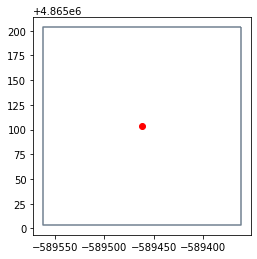

In [31]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt


#Definimos la url del csv que está en GitHub, pero ojo, en modo raw.

url = 'https://raw.githubusercontent.com/JoseCarlosPorto/SingularTree/main/arboles.csv'

#Llamamos df el dataframe que contiene la totalidad del csv

df = pd.read_csv(url)

#Directamente creamos el shapefile de puntos a partir del csv usando geopandas
#Ojo, estamos trabajando con pandas y geopandas que no es la forma tradicional en la que trabaja python
#Creo que estamos usando archivos tipo json o algo asi

gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))

#Esto está bien, pero es innecesario pq el punto ya está creado con el geopandas
#Se crea listas, aunque no son listas como tal, de cada uno de los campos del csv.
'''
tree_id = df['tree_id']
tree_code = df['tree_code']
genus = df['genus']
species = df['species']
dbh = df['dbh']
ht = df['ht']
longitude = df['longitude']
latitude = df['latitude']




#Con el bucle este se podría acceder a cada una de las lineas a nuestro antojo para trabajar con las coordenadas.

for i in range(0,3): #Aquí debería ponerse directamente la longitud del csv para automatizar, en vez de 3.
  print(tree_code[i], genus[i])
'''

#IDEA: Cojer aquí las coordenadas y empezar a crear con ellas el buffer sobre el dataset correspondiente
#IDEA: Igual se podría cargar previamente el dataset, para tenerlo ya abierto antes de entrar en el bucle.
#Habría que ver como convertir estas coordenadas en punto que coincida con el sistema de coordenaadas
#Y despues aplicarle el buffer
#Quizás habría que ver de guardar desde aquí el propio output que se obtenga.

print(gdf)

#Vamos intentar hacer el buffer alrededor del punto

from shapely.geometry import Point

gdf.crs = 'epsg:4326' #Here, I reproject the coordinates to the system I am using
gdf = gdf.to_crs(epsg=3395)

buffer = gdf.buffer(100, cap_style=3) # you might want to use 250, guessing from your image

# Plot the results
fig, ax1 = plt.subplots()
buffer.head(1).boundary.plot(ax=ax1, color = 'slategrey')
gdf.head(1).plot(ax = ax1, color = 'red')

print(buffer)

